In [1]:
# LIBRERIAS
import matplotlib
from ipywidgets.widgets.widget_string import Label
from ipywidgets import interact,widgets
import numpy as np
import matplotlib.pylab as plt
import celluloid as cell  #animations
import pandas as pd
import os
from scipy.interpolate import CubicSpline

path=os.getcwd()
#sns.set_theme()


%matplotlib inline 
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
font = {'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)
import seaborn as sns
import os
path=os.getcwd()



def fourierT(f):

    return np.fft.fftshift(np.fft.ifft(np.fft.fftshift(f)))


def fourierI(f):

    return np.fft.fftshift(np.fft.fft(np.fft.fftshift(f)))



# Discusion ecuación de schrodinger nolineal.

$$i\frac{\partial A}{\partial z}=\frac{\partial^2A }{\partial t^2}+2\left | A \right |^{2}A$$


# Soliton solution.

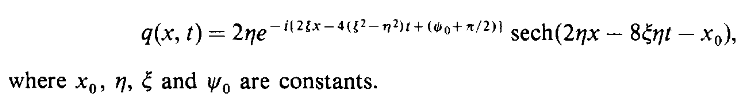



Text(0, 0.5, 'abs(A)')

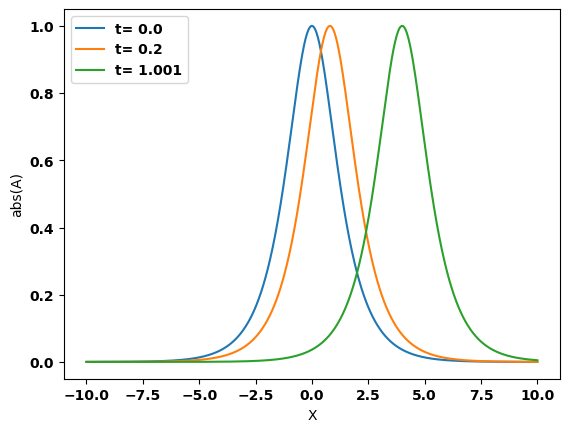

In [92]:
x0=0
psi0=0
e=1
eta=[0.5,1,2,3]
L=20
N=1000
x=np.linspace(-L/2,L/2,N)
T=2
t=np.round(np.linspace(0,T,N),3)

qxt=lambda t: 2*eta[0]*np.exp(-1j*(2*e*x-4*(e**2-eta[0]**2)*t+(psi0+np.pi/2)))*np.cosh(2*eta[0]*x-8*e*eta[0]*t-x0)**(-1)


plt.plot(x,abs(qxt(t[0])),label='t= '+str(t[0]))
plt.plot(x,abs(qxt(t[100])),label='t= '+str(t[100]))
plt.plot(x,abs(qxt(t[500])),label='t= '+str(t[500]))
plt.legend(loc='upper left')
plt.xlabel('X')
plt.ylabel('abs(A)')

In [ ]:
fig=plt.figure(figsize=(8,6))
camera = cell.Camera(fig)
plt.ioff()  #start animation
fig=plt.figure(figsize=(25, 5))
camera = cell.Camera(fig)


for i in t:
    
    
    plt.plot(x,np.abs(qxt(i)))
    camera.snap()

plt.close()
plt.ion();

In [83]:
#Creating the animation from captured frames
animation = camera.animate(interval = 200)
animation.save('soliton.mp4')



# Colision de solitones.

# Ejemplo: Implementación Fourier split algorithm

# DUAL BAND

$$\frac{\partial A}{\partial z}=\left(\frac{g}{2\Omega_g^{2}}-i\frac{\beta_2}{2} \right)\frac{\partial^2A }{\partial t^2}+\frac{g}{2}A+i\gamma\left | A \right |^{2}A$$

$$g=g_0 \text{exp}(-E_p/E_s)$$

$E_p$

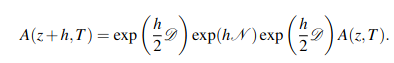

In [15]:
def fourier_split(psi0,poten,deltax,ti,tf):

    N=len(psi0) 

    dt=0.0001

    #f_minn=1/(2*deltax)

    dw=np.pi/(N*deltax)

    V=np.array([j*dw for j in range(-int(N/2),int(N/2))])

    psi=psi0

    UD=np.exp(-1j*V**2*dt,dtype=complex)
    
    UN=np.exp(-1j*dt*poten,dtype=complex)
    
    tt=0

    while tt<abs(tf-ti):

        step1=fourierI(UD*fourierT(psi))

        step2=UN*step1

        step3=fourierI(UD*fourierT(step2))

        psi=step3
    
        tt+=dt
        
    return psi




# Finite difference.

In [10]:

def finite(psi0,deltax,ti,tf):
    
    n=len(psi0) 

    L=n*deltax
    
    f_minn=1/(2*deltax)

    V=2*np.pi*np.arange(-f_minn,f_minn,1/(deltax*n)) # frequency grid

    psi=fourierT(np.asarray(psi0,dtype=complex))

    return fourierI(np.exp(-1j*V**2*0.5*tf)*psi)

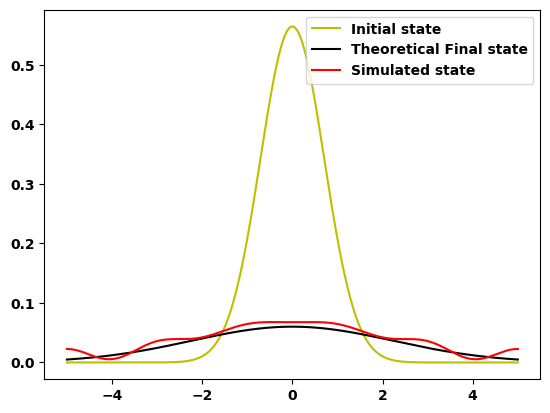

In [42]:
sigma=1
t=3
N=2**13

sigmat=sigma*np.sqrt(1+(t**2/(sigma**4)))

L=10

x=np.linspace(-L/2,L/2,N)

psi0=np.sqrt(1/(np.sqrt(np.pi)*sigma))*np.exp(-x**2/(2*sigma**2))

psit=np.sqrt(1/(np.sqrt(np.pi)*sigmat))*np.exp(-x**2/(2*sigmat**2))

sol=fourier_split(psi0/np.sqrt(np.trapz(psi0,x)),0,L/N,0,t)


plt.plot(x,np.abs(psi0**2),'y',label='Initial state')
plt.plot(x,np.abs(psit/np.sqrt(np.trapz(psit,x)))**2,'k',label='Theoretical Final state')
plt.plot(x,np.abs(sol/np.sqrt(np.trapz(sol,x)))**2,'r',label='Simulated state')
plt.legend()

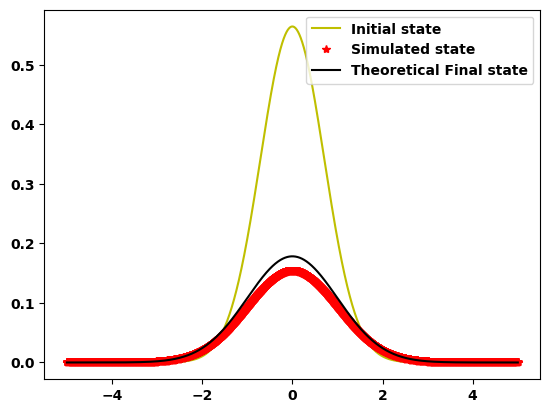

In [69]:
sigma=1
t=1
N=2**13

sigmat=sigma*np.sqrt(1+(t**2/(sigma**4)))

L=10

x=np.linspace(-L/2,L/2,N)

psi0=np.sqrt(1/(np.sqrt(np.pi)*sigma))*np.exp(-x**2/(2*sigma**2))

psit=np.sqrt(1/(np.sqrt(np.pi)*sigmat))*np.exp(-x**2/(2*sigmat**2))

sol=(finite(psi0/np.sqrt(np.trapz(psi0,x)),L/N,0,t))


plt.plot(x,np.abs(psi0**2),'y',label='Initial state')
plt.plot(x,np.abs(sol/np.sqrt(np.trapz(sol,x)))**2,'*r',label='Simulated state')
plt.plot(x,np.abs(psit/np.sqrt(np.trapz(psit,x)))**2,'k',label='Theoretical Final state')
plt.legend()

# Solucion a la ecuación nolineal.

In [173]:
def fourier_split(psi0,gamma,beta2,beta3,deltat,lenght):

    N=len(psi0) 

    dz=0.001

    dw=np.pi/(N*deltat)

    V=np.array([j*dw for j in range(-int(N/2),int(N/2))])

    psi=psi0

    UD=np.exp(dz*0.5*(1j*V**2*0.5*beta2-1j*beta3/6*V**3),dtype=complex)
    
    N=1j*dz*np.abs(psi)**2*gamma

    UN=np.exp(N,dtype=complex)
    
    zz=0

    while zz<=lenght:

        step1=fourierI(UD*fourierT(psi))

        N=1j*dz*np.abs(psi)**2*gamma*0.5

        UN=np.exp(N,dtype=complex)

        step2=UN*step1

        step3=fourierI(UD*fourierT(step2))

        psi=step3

        zz+=dz
        
    return psi






# Espectro ejemplo thorlabs.

In [ ]:
beta2

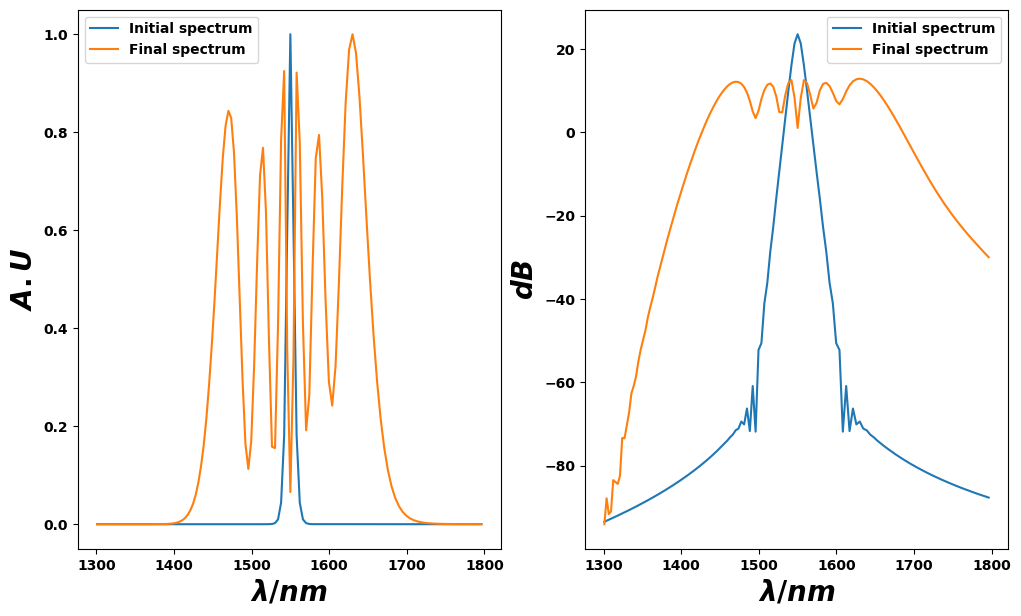

In [184]:
n = 2**13    # number of grid points
TimeWindow = 1e-12 # width of time window [s]     
dT = TimeWindow/n
TimeGrid =  np.arange(-n/2,n/2,1)*dT #  time grid
WaveLength=1550e-9      #reference wavelength [m]
c = 299792458
w0 = (2*np.pi*c)/WaveLength  #reference frequency [Hz]
nu=100e6 #Repetition rate (Hz)
t0 =200e-15       # duration of input [s]
power = 80e-3/(nu*t0)        #peak power of input [W]
length = 1.0             #ibre length [m]
D=-1.0*1e-12*1e9*1e-3 #Dispersion
dD=0.006*1e-12*1e9**2*1e-3  #Dispersion slope
#betas = [beta2, beta3, ...] in units [s^2/m, s^3/m ...]
beta2=-WaveLength**2/(2*np.pi*c)*D
beta3=(WaveLength**2/(2*np.pi*c))**2*(2*D/WaveLength+dD)
A = np.sqrt(power)*1/np.cosh(TimeGrid/(t0/2.634)) # input field [W^(1/2)]
gamma = 10.8e-3
sol=fourier_split(A,gamma,beta2,beta3,dT,length)
#plt.plot(TimeGrid,A)
f=plt.figure(figsize=(12,7))


plt.subplot(121)


dw=np.pi/(n*dT)
V=np.array([j*dw for j in range(-int(n/2),int(n/2))])
W=V+w0
WL = (2*np.pi*c/W) #iis = (WL>400 & WL<1350); % wavelength grid
N1=1300e-9 ;N2=1800e-9
iis=np.array([(i>N1 and i<N2) for i in WL])
ff=fourierT(sol)
fi=fourierT(A)
plt.plot(WL[iis]*1e9,np.abs(fi[iis])**2/max(np.abs(fi[iis])**2),label='Initial spectrum')
plt.plot(WL[iis]*1e9,np.abs(ff[iis])**2/max(np.abs(ff[iis])**2),label='Final spectrum')
plt.xlabel('$\lambda/nm$',fontsize=20)
plt.ylabel('$A.U$',fontsize=20)
plt.legend()
#print('Ld=',t0**2/abs(beta2))
#print('Lnl=',1/(gamma*power))

plt.subplot(122)

plt.plot(WL[iis]*1e9,10*np.log10(np.abs(fi[iis])**2),label='Initial spectrum')
plt.plot(WL[iis]*1e9,10*np.log10(np.abs(ff[iis])**2),label='Final spectrum')
plt.xlabel('$\lambda/nm$',fontsize=20)
plt.ylabel('$dB$',fontsize=20)
plt.legend()

# Experimento:

En un experimento dado un espectro de entrada se logra medir la salida. Por tanto, la simulación debería recibir como entrada es el espectro.

In [2]:
def fourier_split(A_tilde,gamma,beta2,beta3,WL,lenght,k):


    dz=0.01


    V=np.sort(2*np.pi*c/(WL))  #Frequencies.

    midV=(np.max(V)+np.min(V))/2

    V=V - midV# frequency grid

    psi=fourierI(A_tilde)
    
    psi=psi/max(np.abs(psi))*k

    UD=np.exp(dz*0.5*(1j*V**2*0.5*beta2-1j*beta3/6*V**3),dtype=complex)
    
    N=1j*dz*np.abs(psi)**2*gamma

    UN=np.exp(N,dtype=complex)
    
    zz=0

    while zz<=lenght:

        step1=fourierI(UD*fourierT(psi))

        N=1j*dz*np.abs(psi)**2*gamma*0.5

        UN=np.exp(N,dtype=complex)

        step2=UN*step1

        step3=fourierI(UD*fourierT(step2))

        psi=step3

        zz+=dz
        
    return fourierT(psi)






Text(0.5, 0, '$\\lambda/nm$')

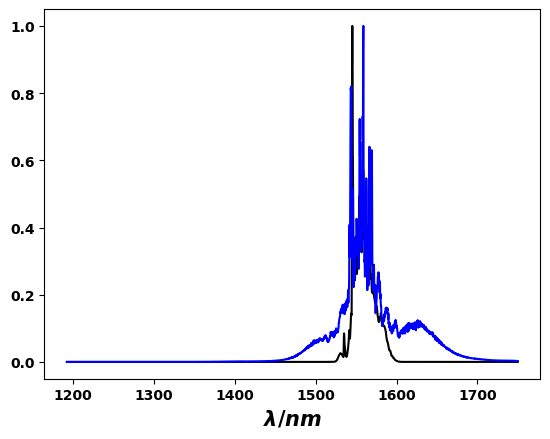

In [3]:
df = pd.read_csv(path+'/MUESTRA_0_0_2.csv',skiprows=27)
power=np.array(df['1749.9'][:])
WL=np.array(df['Stop'][:])  #Wavelenght
df1 = pd.read_csv(path+'/MUESTRA_0_0_1.csv',skiprows=27)
power1=np.array(df1['1749.9'][:])
    #epsilon1=1e-11
    #power=np.where(power>epsilon1,power,epsilon1)
WL=np.array(df['Stop'][:])  #Wavelenght
plt.plot(WL,power/max(power),'k')
plt.plot(WL,power1/max(power1),'b')
plt.xlabel('$\lambda/nm$',fontsize=15)

In [28]:
def anim2(a,b,cc,l,p,k,C,C2):

    
    b=b*1e-8
    p=p*1e-8
    l=l*1e-9

    Nwl=2001
    min_WL=1192.3*1e-9
    max_WL=1749.9*1e-9
    WL_central=1550*1e-9
    #WL_in=np.linspace(min_WL-WL_central,max_WL-WL_central,Nwl)+WL_central
    WL_in=np.linspace(min_WL,max_WL,Nwl)
    

    #pulse=a*np.cosh((WL_in-WL_central)/b)**-1+cc*np.cosh((WL_in-(WL_central+l))/p)**-1
    #pulse=a*np.exp(-(WL_in-WL_central)**2/(2*b**2)*(1+1j*C))+cc*np.exp(-(WL_in-(WL_central+l))**2/(2*p**2)*(1+1j*C2))
    pulse=power
    WaveLength=1550e-9      #reference wavelength [m]
    c = 299792458
    w0 = (2*np.pi*c)/WaveLength  #reference frequency [Hz]
    length = 1.0             #ibre length [m]
    D=-1.0*1e-12*1e9*1e-3 #Dispersion
    dD=0.006*1e-12*1e9**2*1e-3  #Dispersion slope
    #betas = [beta2, beta3, ...] in units [s^2/m, s^3/m ...]
    beta2=-WaveLength**2/(2*np.pi*c)*D
    beta3=(WaveLength**2/(2*np.pi*c))**2*(2*D/WaveLength+dD)
    A = pulse
    gamma = 10.8e-3
    sol=fourier_split(A,gamma,beta2,beta3,WL_in,length,k)

    WL=WL_in
    #plt.plot(TimeGrid,A)
    f=plt.figure(figsize=(13,5))


    plt.subplot(121)

    plt.plot(WL*1e9,np.abs(pulse)**2/max(np.abs(pulse)**2),label='Initial spectrum')
    plt.plot(WL*1e9,np.abs(sol)**2/max(np.abs(sol)**2),label='Final spectrum')
    plt.xlabel('$\lambda/nm$',fontsize=20)
    plt.ylabel('$A.U$',fontsize=20)
    plt.legend()
    #print('Ld=',t0**2/abs(beta2))
    #print('Lnl=',1/(gamma*power))

    plt.subplot(122)

    plt.plot(WL*1e9,10*np.log10(np.abs(power1)**2),label='Initial spectrum')
    plt.plot(WL*1e9,10*np.log10(np.abs(sol)**2),label='Final spectrum')
    plt.xlabel('$\lambda/nm$',fontsize=20)
    plt.ylabel('$dB$',fontsize=20)
    plt.ylim(-150,25)
    plt.legend()


opc=dict(continuous_update=False,readout_format=".3f")
interact(anim2,       
        a= widgets.FloatSlider(min=0,max=1,value=0.32,step=0.01,**opc),  
        b= widgets.FloatSlider(min=0,max=1,value=0.65,step=0.001,**opc),
        cc= widgets.FloatSlider(min=0,max=1,value=0.74,step=0.01,**opc),  
        l= widgets.FloatSlider(min=-100,max=100,value=-14,step=1,**opc),
        p= widgets.FloatSlider(min=0,max=1,value=0.1,step=0.001,**opc),
        k=widgets.FloatSlider(min=0,max=100,value=20,step=0.01,**opc),
        C=widgets.FloatSlider(min=-2*np.pi,max=2*np.pi,value=0,step=0.01,**opc),
        C2=widgets.FloatSlider(min=-2*np.pi,max=2*np.pi,value=0,step=0.01,**opc)
     
        #mm
        );


interactive(children=(FloatSlider(value=0.32, continuous_update=False, description='a', max=1.0, readout_forma…

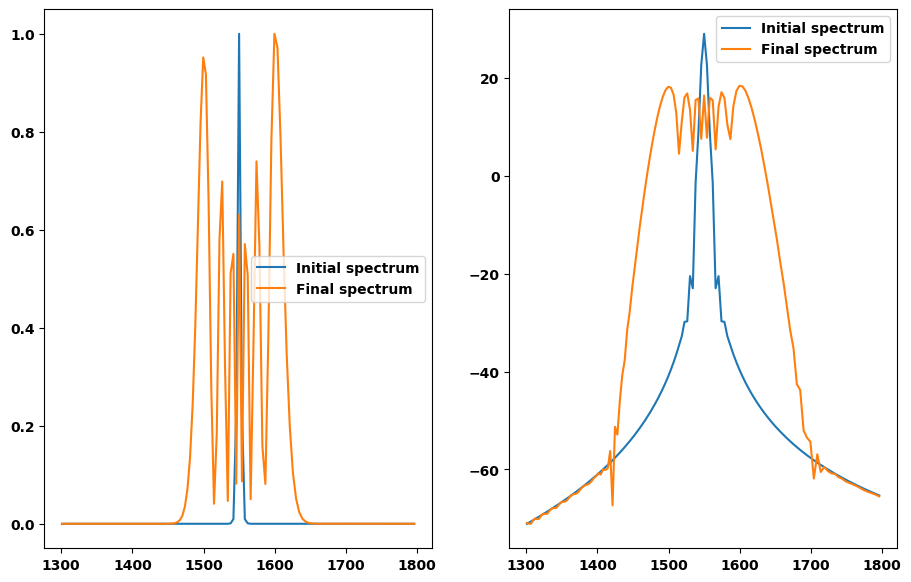

In [36]:
n = 2**13    # number of grid points
TimeWindow = 1e-12 # width of time window [s]     
dT = TimeWindow/n
TimeGrid =  np.arange(-n/2,n/2,1)*dT #  time grid
WaveLength=1550e-9      #reference wavelength [m]
c = 299792458
w0 = (2*np.pi*c)/WaveLength  #reference frequency [Hz]
nu=100e6 #Repetition rate (Hz)
t0 =200e-15       # duration of input [s]
power = 80e-3/(nu*t0)        #peak power of input [W]
length = 1.0             #ibre length [m]
D=-1.0*1e-12*1e9*1e-3 #Dispersion
dD=0.006*1e-12*1e9**2*1e-3  #Dispersion slope
#betas = [beta2, beta3, ...] in units [s^2/m, s^3/m ...]
beta2=-WaveLength**2/(2*np.pi*c)*D
beta3=(WaveLength**2/(2*np.pi*c))**2*(2*D/WaveLength+dD)
A = pulse
gamma = 10.8e-3
sol=fourier_split(A,gamma,beta2,beta3,dT,length)
#plt.plot(TimeGrid,A)
f=plt.figure(figsize=(11,7))


plt.subplot(121)


dw=np.pi/(n*dT)
V=np.array([j*dw for j in range(-int(n/2),int(n/2))])
W=V+w0
WL = (2*np.pi*c/W) #iis = (WL>400 & WL<1350); % wavelength grid
N1=1300e-9 ;N2=1800e-9
iis=np.array([(i>N1 and i<N2) for i in WL])
ff=fourierT(sol)
fi=fourierT(A)
plt.plot(WL[iis]*1e9,np.abs(fi[iis])**2/max(np.abs(fi[iis])**2),label='Initial spectrum')
plt.plot(WL[iis]*1e9,np.abs(ff[iis])**2/max(np.abs(ff[iis])**2),label='Final spectrum')
plt.legend()
#print('Ld=',t0**2/abs(beta2))
#print('Lnl=',1/(gamma*power))

plt.subplot(122)

plt.plot(WL[iis]*1e9,10*np.log10(np.abs(fi[iis])**2),label='Initial spectrum')
plt.plot(WL[iis]*1e9,10*np.log10(np.abs(ff[iis])**2),label='Final spectrum')
plt.legend()

# Coupled equations.

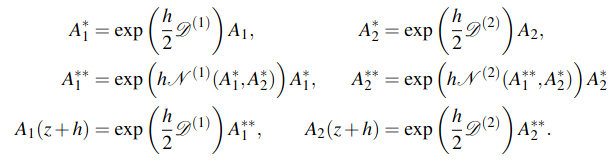

In [43]:
def fourier_splitC(A01,A02,gamma,beta2,beta3,deltat,lenght):

    N=len(A01) 

    dz=0.001

    dw=np.pi/(N*deltat)

    V=np.array([j*dw for j in range(-int(N/2),int(N/2))])

    A1=A01

    A2=A02

    UD1=np.exp(dz*0.5*(1j*V**2*0.5*beta2-1j*beta3/6*V**3),dtype=complex)

    UD2=np.exp(dz*0.5*(1j*V**2*0.5*beta2-1j*beta3/6*V**3),dtype=complex)
    
    zz=0

    while zz<=lenght:

        A1a=fourierI(UD1*fourierT(A1))

        A2a=fourierI(UD1*fourierT(A2))

        N1=1j*gamma*(np.abs(A1a)**2+2*np.abs(A2a)**2)

        A1aa=np.exp(dz*N1)*A1a

        N2=1j*gamma*(np.abs(A2a)**2+2*np.abs(A1aa)**2)

        A2aa=np.exp(dz*N2)*A2a

        A1=fourierI(UD1*fourierT(A1aa))

        A2=fourierI(UD2*fourierT(A2aa))

        zz+=dz
        
    return A1,A2






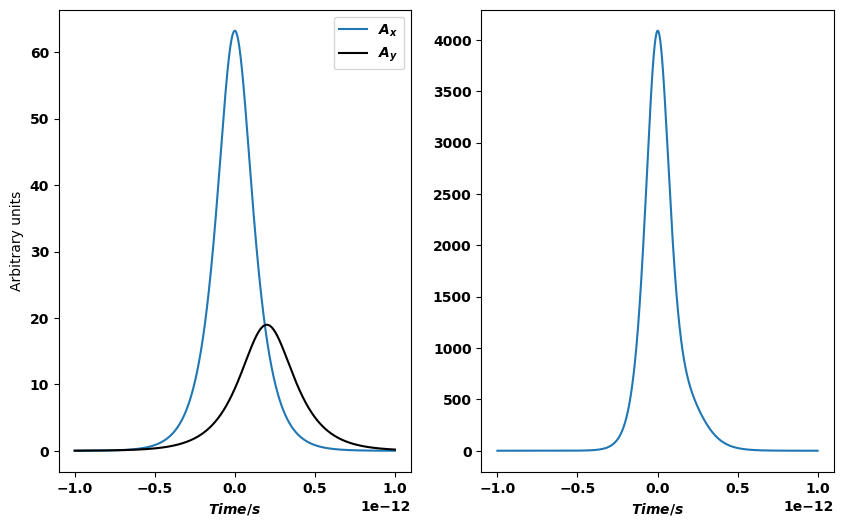

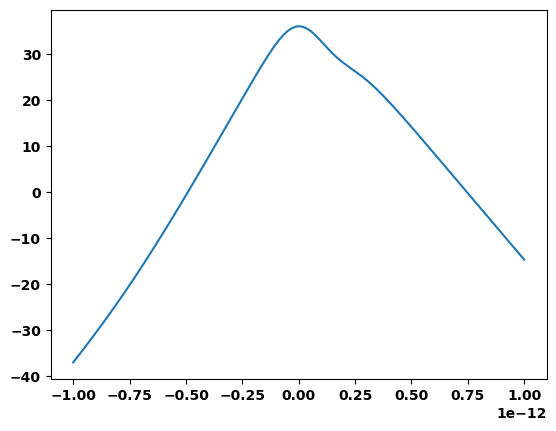

In [3]:
n = 2**14    # number of grid points
TimeWindow = 2e-12 # width of time window [s]     
dT = TimeWindow/n
TimeGrid =  np.arange(-n/2,n/2,1)*dT #  time grid
WaveLength=1550e-9      #reference wavelength [m]
c = 299792458
w0 = (2*np.pi*c)/WaveLength  #reference frequency [Hz]
nu=100e6 #Repetition rate (Hz)
t0 =200e-15       # duration of input [s]
power = 80e-3/(nu*t0)        #peak power of input [W]
length = 1.0             #ibre length [m]
D=-1.0*1e-12*1e9*1e-3 #Dispersion
dD=0.006*1e-12*1e9**2*1e-3  #Dispersion slope
#betas = [beta2, beta3, ...] in units [s^2/m, s^3/m ...]
beta2=-WaveLength**2/(2*np.pi*c)*D
beta3=(WaveLength**2/(2*np.pi*c))**2*(2*D/WaveLength+dD)
gamma = 10.8e-3


a=1*np.sqrt(power)
c=0.3*np.sqrt(power)
b=100e-15
l=2e-13
p=150e-15
T=TimeGrid
A1=a*np.cosh((T)/b)**-1
A2=c*np.cosh((T-l)/p)**-1

f=plt.figure(figsize=(10,6))


#plt.plot(dfA['Stop'][:],dfA['1749.9'][:]/max(dfA['1749.9'][:]),'k',label='Real+noise')
plt.subplot(121)
plt.plot(T,A1,label='$A_x$')
plt.plot(T,A2,'k',label='$A_y$')
plt.xlabel('$Time /s$')
plt.ylabel('Arbitrary units')
plt.legend()


plt.subplot(122)
plt.plot(T,np.abs(A1)**2+np.abs(A2)**2,label='$A_x$')
plt.xlabel('$Time /s$')
#plt.plot(TimeGrid,A)

m=plt.figure()

plt.plot(T,10*np.log10(np.abs(A1)**2+np.abs(A2)**2))



In [169]:
sol1,sol2=fourier_splitC(A1,A2,gamma,beta2,beta3,dT,length )

(-0.3, 0.3)

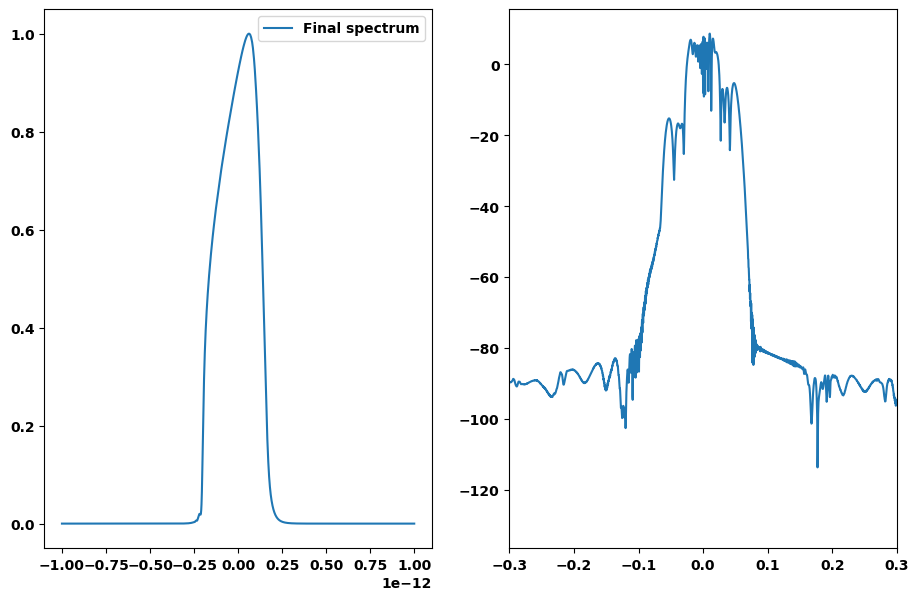

In [172]:
dw=2*np.pi/(n*dT)
V=np.array([j*dw for j in range(-int(n/2),int(n/2))])
W=V+w0
WL = (2*np.pi*c/W) #iis = (WL>400 & WL<1350); % wavelength grid
N1=1300e-9 ;N2=1800e-9
iis=np.array([(i>N1 and i<N2) for i in WL])

totalf=np.abs(fourierT(sol1+sol2))**2
total=np.abs(sol1)**2+np.abs(sol2)
f=plt.figure(figsize=(11,7))


plt.subplot(121)



#fi=np.abs(A1[iis])**2+np.abs(A2[iis])**2
#plt.plot(WL[iis]*1e9,np.abs(fi)**2/max(np.abs(fi)**2),label='Initial spectrum')
plt.plot(TimeGrid,np.abs(total)**2/max(np.abs(total)**2),label='Final spectrum')

#plt.plot(WL[iis]*1e9,np.abs(ff2[iis])**2/max(np.abs(ff2[iis])**2),label='Final spectrum 2')
#plt.plot(WL[iis]*1e9,total/max(np.abs(total)),label='Final spectrum 2')
plt.legend()
#print('Ld=',t0**2/abs(beta2))


plt.subplot(122)
plt.plot(V*1e-16,10*np.log10(totalf))
plt.xlim(-0.3,0.3)

# Experimento.

In [26]:
def fourier_splitC(A01,A02,gamma,beta2,beta3,WL,lenght,k,p):

    c = 299792458
   
    dz=0.001

    V=np.sort(2*np.pi*c/(WL))  #Frequencies.

    midV=(np.max(V)+np.min(V))/2

    V=V - midV# frequency grid

    A1=fourierI(A01)*k

    A2=fourierI(A02)*k

    UD1=np.exp(dz*0.5*(1j*V**2*0.5*beta2-1j*beta3/6*V**3),dtype=complex)

    UD2=np.exp(dz*0.5*(1j*V**2*0.5*beta2-1j*beta3/6*V**3),dtype=complex)
    
    zz=0

    while zz<=lenght:

        A1a=fourierI(UD1*fourierT(A1))

        A2a=fourierI(UD1*fourierT(A2))

        N1=1j*gamma*(np.abs(A1a)**2+2*np.abs(A2a)**2)

        A1aa=np.exp(dz*N1)*A1a

        N2=1j*gamma*p*(np.abs(A2a)**2+2*np.abs(A1aa)**2)

        A2aa=np.exp(dz*N2)*A2a

        A1=fourierI(UD1*fourierT(A1aa))

        A2=fourierI(UD2*fourierT(A2aa))

        zz+=dz
        
    return fourierT(A1),fourierT(A2)






In [27]:
def anim2(a,b,cc,l,p,k,C,C2):

    
    b=b*1e-8
    l=l*1e-9
    Nwl=2001
    min_WL=1192.3*1e-9
    max_WL=1749.9*1e-9
    WL_central=1550*1e-9
    #WL_in=np.linspace(min_WL-WL_central,max_WL-WL_central,Nwl)+WL_central
    WL_in=np.linspace(min_WL,max_WL,Nwl)
    

    #pulse=a*np.cosh((WL_in-WL_central)/b)**-1+cc*np.cosh((WL_in-(WL_central+l))/p)**-1
    pulse=np.sqrt(power)#a*np.exp(-(WL_in-WL_central)**2/(2*b**2)*(1+1j*C))
    pulse2=a*np.sqrt(power)*np.exp(1j*C2) #cc*np.exp(-(WL_in-(WL_central+l))**2/(2*p**2))*np.exp(1j*C2)

    WaveLength=1550e-9      #reference wavelength [m]
    c = 299792458
    w0 = (2*np.pi*c)/WaveLength  #reference frequency [Hz]
    length = 1.0             #ibre length [m]
    D=-1.0*1e-12*1e9*1e-3 #Dispersion
    dD=0.006*1e-12*1e9**2*1e-3  #Dispersion slope
    #betas = [beta2, beta3, ...] in units [s^2/m, s^3/m ...]
    beta2=-WaveLength**2/(2*np.pi*c)*D
    beta3=(WaveLength**2/(2*np.pi*c))**2*(2*D/WaveLength+dD)
    A = pulse
    A2= a*pulse2
    gamma = 10.8e-3
    sol1,sol2=fourier_splitC(A,pulse2,gamma,beta2,beta3,WL_in,length,k,p)
    sol=np.abs(sol1)**2+np.abs(sol2)**2
    WL=WL_in
    ini=(np.abs(pulse)**2+np.abs(pulse2)**2)
    #plt.plot(TimeGrid,A)
    f=plt.figure(figsize=(13,5))


    plt.subplot(121)

    plt.plot(WL*1e9,ini,label='Initial spectrum')
    plt.plot(WL*1e9,np.abs(sol)**2/max(np.abs(sol)**2),label='Final spectrum')
    plt.xlabel('$\lambda/nm$',fontsize=20)
    plt.ylabel('$A.U$',fontsize=20)
    plt.legend()
    print(Delta_landa1(power1,WL))
    print(Delta_landa1(np.abs(sol)**2,WL))
    #print('Ld=',t0**2/abs(beta2))
    #print('Lnl=',1/(gamma*power))

    plt.subplot(122)

    plt.plot(WL*1e9,10*np.log10(np.abs(power1)**2),label='Initial spectrum')
    plt.plot(WL*1e9,10*np.log10(np.abs(sol)**2),label='Experimental spectrum')
    plt.xlabel('$\lambda/nm$',fontsize=20)
    plt.ylabel('$dB$',fontsize=20)
    plt.ylim(-200,25)
    plt.legend()


opc=dict(continuous_update=False,readout_format=".3f")
interact(anim2,       
        a= widgets.FloatSlider(min=0,max=1,value=1,step=0.01,**opc),  
        b= widgets.FloatSlider(min=0,max=1,value=0.65,step=0.001,**opc),
        cc= widgets.FloatSlider(min=0,max=1,value=0.74,step=0.01,**opc),  
        l= widgets.FloatSlider(min=-100,max=100,value=-14,step=1,**opc),
        p= widgets.FloatSlider(min=0,max=1,value=0.855,step=0.001,**opc),
        k=widgets.FloatSlider(min=0,max=10,value=0.280,step=0.01,**opc),
        C=widgets.FloatSlider(min=-2*np.pi,max=2*np.pi,value=0,step=0.01,**opc),
        C2=widgets.FloatSlider(min=-2*np.pi,max=2*np.pi,value=0,step=0.01,**opc)
     
        #mm
        );


interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='a', max=1.0, readout_format…